<a href="https://colab.research.google.com/github/YukiyaKobayashi09/TIL/blob/master/VGG16Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16という学習済みモデルを使ったサンプル

## 概要
- ImageNetという大規模画像データセットを用いて学習されたデータモデル
- 16層からなるCNN(畳み込みニューラルネットワーク)なので、 VGG**16**

## 事前準備編

### VGG16のインポートとModelのダウンロード

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

553467904/553467096 [==============================] - 3s 0us/step


### テストデータの準備(GoogleDriveと連携)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ImageNetから適当に手に入れた画像を元に分類してみる

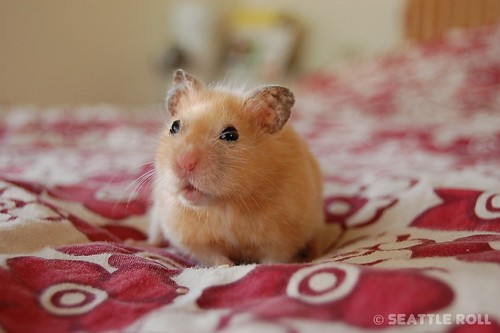

In [19]:
# 分類してみる画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image('/content/drive/My Drive/test/HAMUSUTA.jpg'))


In [16]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# 学習済みのVGG16をロード
# 構造とともに学習済みの重みも読み込まれる
model = VGG16(weights='imagenet')

img = image.load_img('/content/drive/My Drive/test/HAMUSUTA.jpg', target_size=(224, 224))

# 画像をデータ配列(array)に変換
x = image.img_to_array(img)
# print(x)

# 3次元テンソル（rows, cols, channels) → 4次元テンソル (samples, rows, cols, channels) に変換
x = np.expand_dims(x, axis=0)

# Top-5のクラスを予測する
preds = model.predict(preprocess_input(x))
results = decode_predictions(preds, top=5)[0]
for result in results:
    print(result)

('n02342885', 'hamster', 0.98898137)
('n02364673', 'guinea_pig', 0.0048374133)
('n07714990', 'broccoli', 0.0019719263)
('n03794056', 'mousetrap', 0.0010523209)
('n02356798', 'fox_squirrel', 0.0004627495)


## 課題：  
1. 既存の学習済みモデル(重み含め)を利用しているので  
   当たり前だがImageNetにない画像だと正答率が下がる
1. 次回はVGG16を応用して自分自身でモデルを作成し画像分類してみる(Fine-tuning)